# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct',
       'net_bill'],
      dtype='object')

In [3]:
y,x = patsy.dmatrices('tip ~ net_bill',data=tips)

In [4]:
reg1 = sm.OLS(y,x).fit()

In [5]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           5.02e-23
Time:                        15:48:43   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#removendo as varáiveis insignificantes
y,x = patsy.dmatrices('tip ~ sex + smoker + time + net_bill',data=tips)

In [7]:
reg1 = sm.OLS(y,x).fit()


In [8]:
reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           2.64e-20
Time:                        15:48:43   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

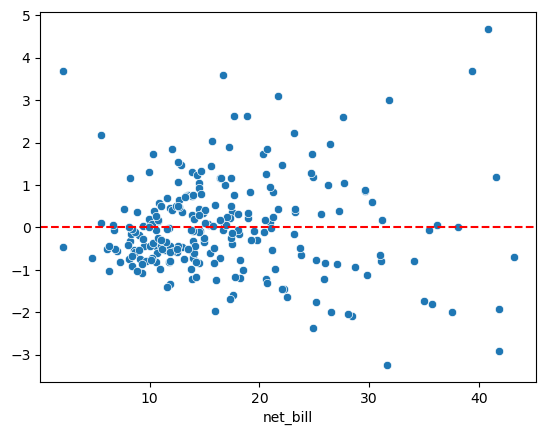

In [9]:
sns.scatterplot(x = 'net_bill', y = reg1.resid, data = tips)
plt.axhline(y = 0, linestyle = '--', color = 'r')

In [10]:

y1,x1 = patsy.dmatrices('tip ~ sex + smoker + time + np.log(net_bill)',data=tips)
y2,x2 = patsy.dmatrices('tip ~ sex + smoker + time + np.power(net_bill,2)',data=tips)

In [11]:
reg_log = sm.OLS(y1,x1).fit()
reg_pot = sm.OLS(y2,x2).fit()

In [12]:
print(reg_log.summary())
print(reg_pot.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     25.06
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           2.41e-17
Time:                        15:48:44   Log-Likelihood:                -382.22
No. Observations:                 244   AIC:                             774.4
Df Residuals:                     239   BIC:                             791.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3107      0.469  

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

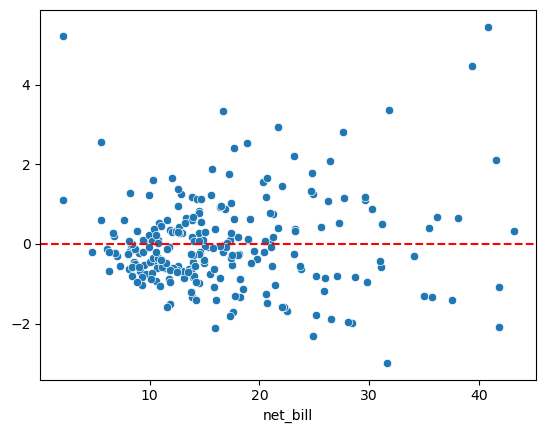

In [13]:
sns.scatterplot(x = 'net_bill', y = reg_log.resid, data = tips)
plt.axhline(y = 0, linestyle = '--', color = 'r')

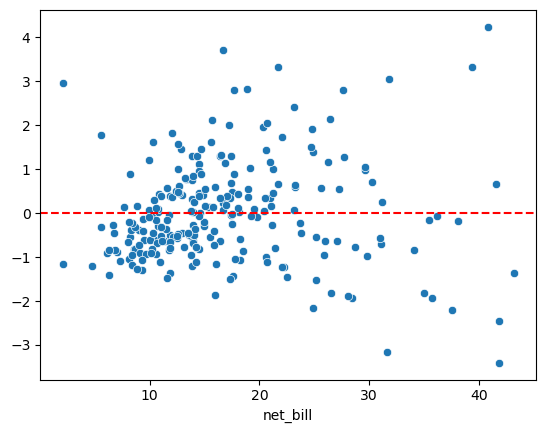

In [14]:

sns.scatterplot(x = 'net_bill', y = reg_pot.resid, data = tips)
plt.axhline(y = 0, linestyle = '--', color = 'r')

o gráfico residual do netbill ao quadrado até que está bem equilibrado, porém o primeiro possui um R²
 e um gráfico residual interessante.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [15]:
previsao = pd.read_csv('previsao.csv')
previsao.head()


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [16]:
previsao.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [17]:
previsao.columns


Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [18]:
previsao.drop(['Unnamed: 0','index'], axis = 1, inplace=True)


In [19]:
prev_renda = smf.ols('renda ~ mau + tempo_emprego + posse_de_imovel',data = previsao).fit() 
prev_renda.summary() # tempo_emprego e posse_de_imovel parecem que são boas variáveis, mas sera utilizada apenas
#tempo_emprego

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     773.9
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:48:44   Log-Likelihood:            -1.2248e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12462   BIC:                         2.450e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2381.3828     82.473     28.875      0.000    2219.723    2543.043
mau[T.True]               144.2354    261.424      0.552      0.581    -368.197     656.668
posse_de_imovel[T.True]   410.9272     84.145      4.884      0.000     245.989     575.865
tempo_emprego             283.5035      5.918     47.906      0.000     271.903     295.104
==============================================================================
Omnibus:                     9988.968   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           390329.775
Skew:                           3.567   Prob(JB):                         0.00
Kurtosis:                      29.469   Cond. No.                         67.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
prev_renda_n = smf.ols('renda ~ tempo_emprego',data = previsao).fit() 


In [21]:
prev_renda_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:48:44   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

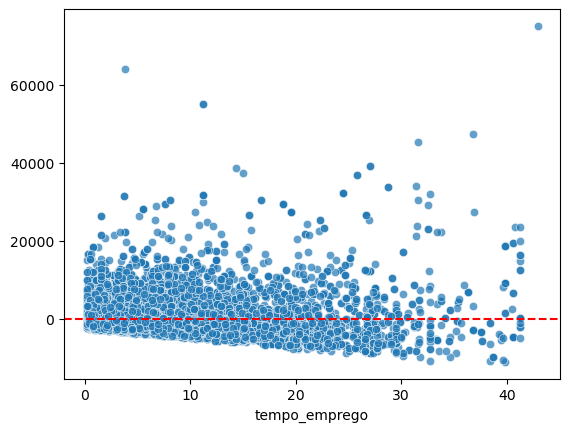

In [22]:
sns.scatterplot(x = 'tempo_emprego', y =prev_renda_n.resid, data = previsao, alpha= 0.7)
plt.axhline(y = 0, color ='r', linestyle = '--' )

In [23]:

prev_renda_log = smf.ols('renda ~ np.power(tempo_emprego,2)',data = previsao).fit()
prev_renda_pot = smf.ols('renda ~ np.log(tempo_emprego)',data = previsao).fit() 

In [24]:
print(prev_renda_log.summary()) # R² = 0.166
print(prev_renda_pot.summary()) # R² = 0.083

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:48:45   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [25]:
prev_renda_pot2 = smf.ols('np.log(renda) ~ np.log(tempo_emprego)',data = previsao).fit() 


In [26]:
prev_renda_pot2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          2.85e-289
Time:                        15:48:45   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7492      0.013    603.989      0.000       7.724       7.774
np.log(tempo_emprego)     0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# melhor resutado, log de tempo_emprego


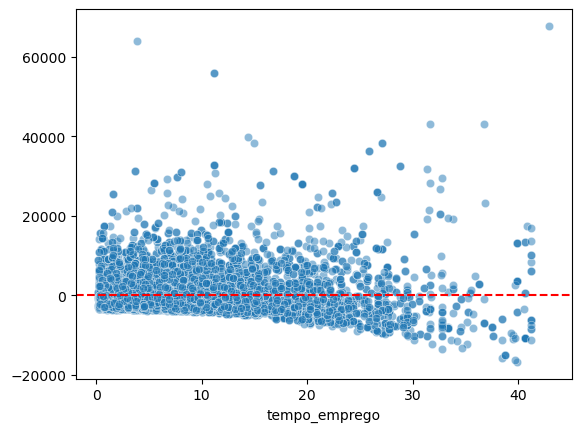

In [28]:

sns.scatterplot(x = 'tempo_emprego', y = prev_renda_log.resid, data = previsao, alpha=0.5)
plt.axhline(y = 0, linestyle = '--', color = 'r')

In [29]:
previsao.columns

Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [30]:
# verifivando os parametros e identificando os melhores para ser utilizados no modelo de regressão


In [31]:
prev_reg = smf.ols('renda ~ sexo + posse_de_veiculo + qtd_filhos + tipo_renda +'
                   'educacao + qt_pessoas_residencia + estado_civil + posse_de_imovel', data = previsao).fit()

In [32]:

prev_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     49.82
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          3.06e-164
Time:                        15:48:45   Log-Likelihood:            -1.4747e+05
No. Observations:               15000   AIC:                         2.950e+05
Df Residuals:                   14982   BIC:                         2.951e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2319.6173   1563.716      1.483      0.138    -745.457    5384.691
sexo[T.M]                        1817.6742     86.594     20.991      0.000    1647.940    1987.408
posse_de_veiculo[T.True]         -188.8494     82.791     -2.281      0.023    -351.129     -26.570
tipo_renda[T.Bolsista]             -9.0784   2254.868     -0.004      0.997   -4428.895    4410.739
tipo_renda[T.Empresário]          673.9385     93.924      7.175      0.000     489.836     858.041
tipo_renda[T.Pensionista]        -751.5579    109.794     -6.845      0.000    -966.767    -536.349
tipo_renda[T.Servidor público]   1243.2868    135.145      9.200      0.000     978.386    1508.188
educacao[T.Pós graduação]        2417.3630   1085.918      2.226      0.026     288.830    4545.896
educacao[T.Secundário]            738.0780    329.516      2.240      0.025      92.187    1383.969
educacao[T.Superior completo]    1193.6718    333.029      3.584      0.000     540.894    1846.449
educacao[T.Superior incompleto]   291.2495    376.164      0.774      0.439    -446.079    1028.578
estado_civil[T.Separado]          308.8948    780.733      0.396      0.692   -1221.437    1839.226
estado_civil[T.Solteiro]          124.3643    765.701      0.162      0.871   -1376.503    1625.232
estado_civil[T.União]            -268.8214    139.831     -1.922      0.055    -542.906       5.264
estado_civil[T.Viúvo]             236.3049    786.267      0.301      0.764   -1304.874    1777.483
posse_de_imovel[T.True]           433.4083     78.984      5.487      0.000     278.590     588.227
qtd_filhos                       -539.8804    764.940     -0.706      0.480   -2039.256     959.496
qt_pessoas_residencia             321.2217    763.583      0.421      0.674   -1175.494    1817.938
==============================================================================
Omnibus:                    13101.734   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           648456.888
Skew:                           4.006   Prob(JB):                         0.00
Kurtosis:                      34.198   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# variáveis úteis : posse_de_imovel, posse_de_veiculo, tempo_emprego(como ja tinha sido analisado antes) 
#educacao(talvez, um dos valores tem um p value > 5%), tipo_renda e sexo 

In [34]:

prev_reg = smf.ols('renda ~ posse_de_veiculo + tipo_renda +'
                   'educacao +  posse_de_imovel + tempo_emprego ', data = previsao).fit()

In [35]:
print(prev_reg.summary()) # R² = 0.172, tentar melhorar

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     235.5
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:48:45   Log-Likelihood:            -1.2237e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12454   BIC:                         2.448e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [36]:
prev_reg_log = smf.ols('np.log(renda) ~ posse_de_veiculo + tipo_renda +'
                   'educacao +  posse_de_imovel + tempo_emprego + sexo', data = previsao).fit()
# como em algumas váriaveis podem possui o valor 0, não é possivel aplicar o log nelas, sendo assim
# apliquei somente na variável renda

In [37]:
prev_reg_log.summary()# R² = melhorou para 0.238

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     323.8
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:48:46   Log-Likelihood:                -13237.
No. Observations:               12466   AIC:                         2.650e+04
Df Residuals:                   12453   BIC:                         2.660e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.3947      0.072    103.196      0.000       7.254       7.535
posse_de_veiculo[T.True]           -0.0006      0.014     -0.045      0.964      -0.027       0.026
tipo_renda[T.Bolsista]             -0.0033      0.350     -0.009      0.992      -0.690       0.683
tipo_renda[T.Empresário]            0.1773      0.015     12.129      0.000       0.149       0.206
tipo_renda[T.Pensionista]           0.4052      0.234      1.735      0.083      -0.053       0.863
tipo_renda[T.Servidor público]      0.0915      0.021      4.326      0.000       0.050       0.133
educacao[T.Pós graduação]           0.5853      0.176      3.334      0.001       0.241       0.929
educacao[T.Secundário]              0.0447      0.071      0.631      0.528      -0.094       0.184
educacao[T.Superior completo]       0.1324      0.071      1.858      0.063      -0.007       0.272
educacao[T.Superior incompleto]    -0.0126      0.076     -0.165      0.869      -0.162       0.137
posse_de_imovel[T.True]             0.1029      0.013      7.800      0.000       0.077       0.129
sexo[T.M]                           0.4764      0.014     33.723      0.000       0.449       0.504
tempo_emprego                       0.0504      0.001     53.151      0.000       0.049       0.052
==============================================================================
Omnibus:                        1.027   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.994
Skew:                          -0.014   Prob(JB):                        0.608
Kurtosis:                       3.033   Cond. No.                         579.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
prev_reg_pow = smf.ols('renda ~ np.power(posse_de_veiculo,2) +'
                       'np.power(posse_de_imovel,2) +'
                       'np.power(tempo_emprego,2)', data = previsao).fit()
#retirada as variáveis que não suportam potencia, restando as três

In [39]:
prev_reg_pow.summary() # depois das modificações, o R² = 0,173

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     871.4
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:48:46   Log-Likelihood:            -1.2236e+05
No. Observations:               12466   AIC:                         2.447e+05
Df Residuals:                   12462   BIC:                         2.447e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      3203.8208     78.938     40.587      0.000    3049.090    3358.551
np.power(posse_de_veiculo, 2)   784.8894     80.738      9.721      0.000     626.631     943.148
np.power(posse_de_imovel, 2)    363.4776     83.319      4.362      0.000     200.159     526.796
np.power(tempo_emprego, 2)       10.1723      0.201     50.647      0.000       9.779      10.566
==============================================================================
Omnibus:                     9690.575   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           341800.812
Skew:                           3.439   Prob(JB):                         0.00
Kurtosis:                      27.713   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:

#modelo que será utilizado será o prev_reg_log pelo R² se melhor do que os outros modelos

In [41]:
previsao['pred_log'] = np.exp(prev_reg_log.fittedvalues)

In [42]:
previsao[['renda','pred_log']].corr().iloc[0,1]**2 # R²


0.2400917069600583

<Axes: xlabel='tempo_emprego'>

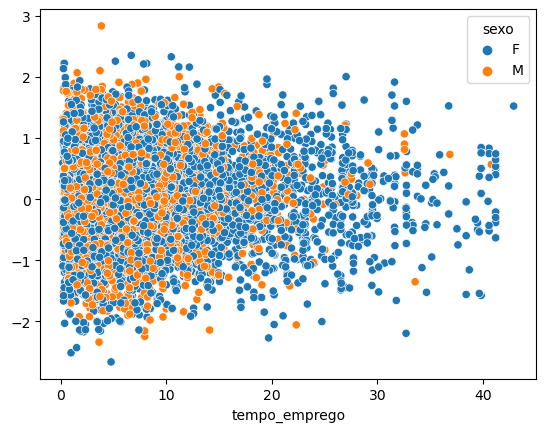

In [43]:

# plotando a o gráfico da dispersão residual

sns.scatterplot(x = 'tempo_emprego' ,y = prev_reg_log.resid, hue = 'sexo', data=previsao)

In [44]:
# podemos ver , que utilizando apenas o parametro de tempo de emprego, o dado 'F', apresenta
# uma maior dispersão dos resíduos

In [45]:
sns.regplot(x = 'tempo_emprego' , y = 'renda',
            data = previsao)
plt.plot(previsao['tempo_emprego'], previsao['pred_log'], 'r,--'

SyntaxError: incomplete input (1417837735.py, line 3)

In [ ]:
#acima representando o gráfico da regressão utilizando como x o dado de tempo_emprego